In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [15]:
df = pd.read_csv('demand_data.csv')

In [16]:
df.columns

Index(['Unnamed: 0', 'ZIP', 'Latitude', 'Longitude', 'Traffic Density',
       'Food/Beverage/General Stores', 'Sustenance',
       'Outdoor/Sport/Household Shops', 'Entertainment/Arts/Culture',
       'Financial', 'Education', 'Healthcare', 'Tourism', 'Leisure',
       'Public Buildings', 'Shops', 'Transportation', 'Places of Worship',
       'EV Density', 'Nearby Stations', 'Level 2 Ports', 'DCFC Ports',
       'Energy Demand', 'Charge Duration'],
      dtype='object')

I dropped an extraneous column here and also ZIP code because I don't think we want the model to predict based on that lol. But in the future I'm thinking we drop latitude and longitude also because that probably isn't the best metric to predict demand, so maybe try dropping those as well.

In [3]:
df.drop(['ZIP'], axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
df[df['DCFC Ports'] == 20]

,Latitude,Longitude,Traffic Density,Food/Beverage/General Stores,Sustenance,Outdoor/Sport/Household Shops,Entertainment/Arts/Culture,Financial,Education,Healthcare,...,Public Buildings,Shops,Transportation,Places of Worship,EV Density,Nearby Stations,Level 2 Ports,DCFC Ports,Energy Demand,Charge Duration
111,42.6887,-73.8533,2756.0,8,12,2,1,0,0,0,...,2,14,1,3,151,3,0.0,20.0,193.58664,10


In [9]:
# pearson = df.corr(method='pearson')
# plt.figure(figsize=(15, 15))
# sns.heatmap(pearson, 
#             xticklabels=pearson.columns,
#             yticklabels=pearson.columns,
#             cmap='RdBu_r',
#             annot=True,
#             linewidth=0.5)

Finally, train up different models to see the results.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['Energy Demand','Charge Duration'], axis=1)
y = df['Energy Demand']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=89)

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

# some methods
def gboost(X_train, y_train):
    boost = GradientBoostingRegressor()
    boost.fit(X_train, y_train)
    return boost

def randforest(X_train, y_train):
    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)
    return forest

def bagreg(X_train, y_train):
    bag = BaggingRegressor()
    bag.fit(X_train, y_train)
    return bag

boost = gboost(X_train, y_train)
boost.score(X_test, y_test)

0.9236669333700638

This is the code to find the feature importances. Yall can also try to visualize it in other ways (idk how to work with decision trees that well)

Text(0.5, 1.0, 'Feature Importance (MDI)')

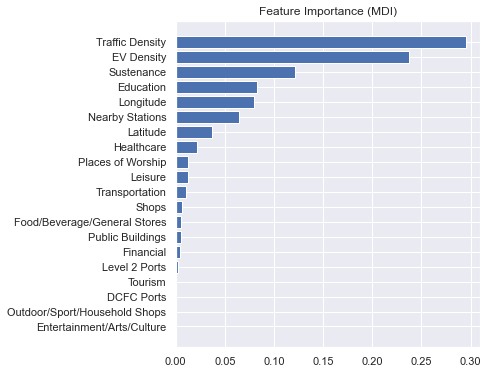

In [8]:
# export results or visualize in some way
feature_importance = boost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

If we look at the boxplots there are actually a lot of outliers in the data so I was wondering how we could deal with that with normalization/scaling.

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


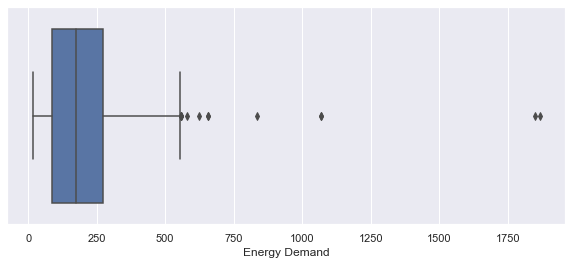

In [9]:
plt.figure(figsize=(10, 4))
sns.boxplot(df['Energy Demand'])
plt.show()

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


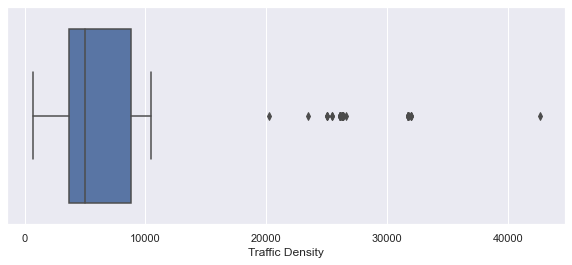

In [10]:
plt.figure(figsize=(10, 4))
sns.boxplot(df['Traffic Density'])
plt.show()

Here I try out the QuantileTransformer. Also this changes the dataframe and previous variables so if you wanna skip this part then prob just restart the kernel and comment all of it out.

In [11]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df['Energy Demand'] = scaler.fit_transform(df[['Energy Demand']])
df['Energy Demand']

C:\Users\allen\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (198). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


0      0.030457
1      0.347716
2      0.347716
3      0.347716
4      0.347716
         ...   
193    0.789340
194    0.748731
195    0.934010
196    0.827411
197    0.837563
Name: Energy Demand, Length: 198, dtype: float64

In [12]:
df['Traffic Density'] = scaler.fit_transform(df[['Traffic Density']])
df['Traffic Density']

C:\Users\allen\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (198). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


0      0.060914
1      0.507614
2      0.507614
3      0.507614
4      0.507614
         ...   
193    0.901015
194    0.860406
195    1.000000
196    0.807107
197    0.918782
Name: Traffic Density, Length: 198, dtype: float64

In [13]:
X = df.drop(['Energy Demand','Charge Duration', 'Latitude', 'Longitude'], axis=1)
y = df['Charge Duration']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=89)

In [14]:
boost = gboost(X_train, y_train)
boost.score(X_test, y_test)

0.8957021714424226

Text(0.5, 1.0, 'Feature Importance (MDI)')

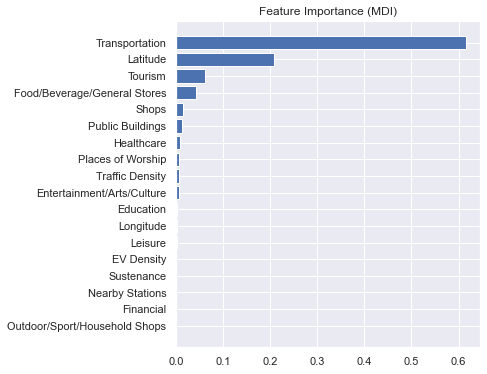

In [15]:
# export results or visualize in some way
feature_importance = boost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')